# 각 곡의 스펙토그램
각 가수의 포넌트 차이비교

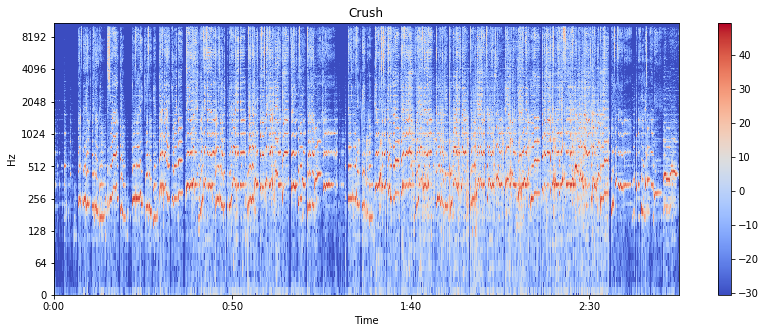

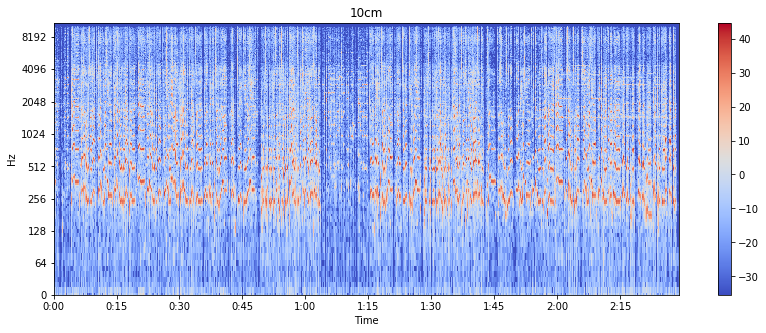

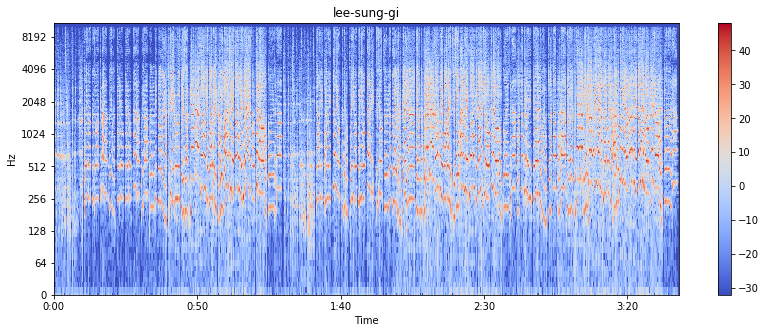

In [127]:
%matplotlib inline
import librosa
import matplotlib.pyplot as plt
import librosa.display

local_path='C:/Users/wnduq/Desktop/output_music/{}.wav_vocals_vad.wav'
vocal = ['Crush','10cm','이승기','폴킴','테이','환희']
vocal_eng = ['Crush','10cm','lee-sung-gi','lee-hong-gi','tei','hawn-hui']


for i in range(3):
    song = local_path.format(vocal[i])
    x , sr_x = librosa.load(song)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14,5))
    plt.title(vocal_eng[i])
    librosa.display.specshow(Xdb,sr=sr_x,x_axis='time',y_axis='log')
    plt.colorbar()

# periodogram을 통해 본 포넌트 차이
프레임(10ms)에서의 preriodogram을 통해 가수별 포넌트차이를 확인

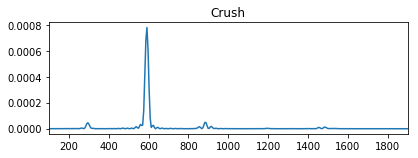

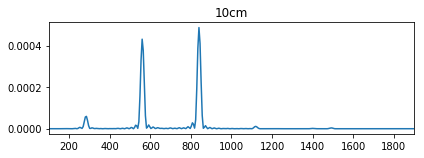

In [128]:
import scipy as sp
for i in range(2):
    song = local_path.format(vocal[i])
    x , sr_x = librosa.load(song)
    x_sam = x[3000000:3001000] #남성 고음부에서 비교
    f, P = sp.signal.periodogram(x_sam, sr_x, nfft=2**12)

    plt.subplot(211)
    plt.plot(f, P)
    plt.xlim(100, 1900)
    plt.title(vocal_eng[i])

    plt.tight_layout()
    plt.show()

# 1초 동안의 MFCC 

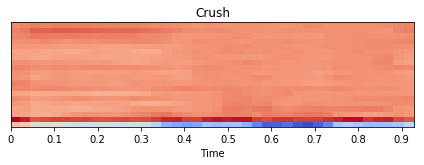

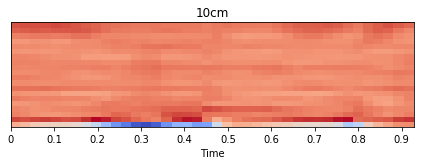

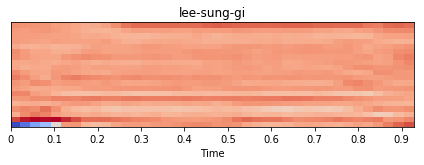

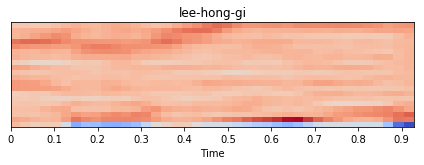

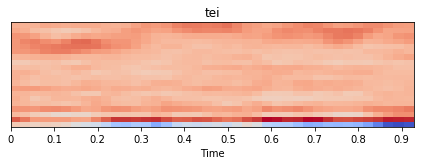

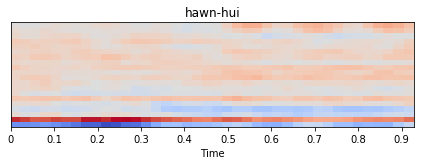

In [135]:
for i in range(6):
    song = local_path.format(vocal[i])
    x , sr_x = librosa.load(song)
    x = x[3000000:3020000] #약 1초정도만 본다
    mfcc = librosa.feature.mfcc(x,sr=sr_x,n_mels=50, fmax=5000)
    plt.subplot(211)
    librosa.display.specshow(mfcc, x_axis='time')
    plt.title(vocal_eng[i])
    plt.tight_layout()
    plt.show()

###그림으로 보면 분류가 잘될것 같은데...

# 전체 곡에서의 전반적인 MFCC의 차이

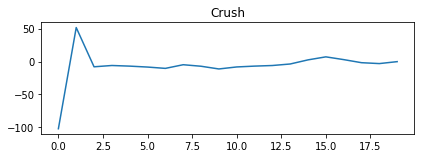

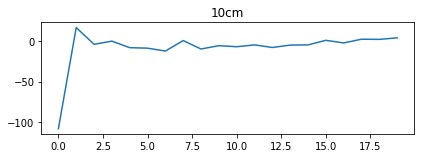

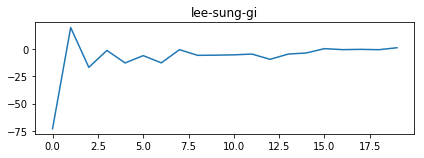

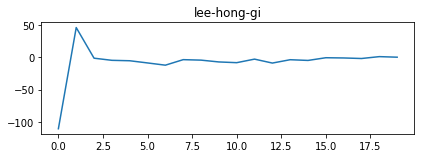

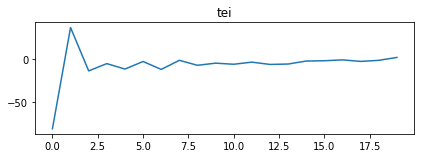

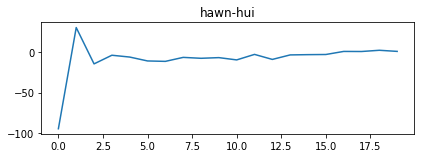

In [134]:
for i in range(6):
    song = local_path.format(vocal[i])
    x , sr_x = librosa.load(song)
    mfcc = librosa.feature.mfcc(x,sr=sr_x,n_mels=50, fmax=5000)
    mfcc_mean = list(map(lambda x: np.mean(x),mfcc)) #전체곡에서 평균
    plt.subplot(211)
    plt.plot(mfcc_mean)
    plt.title(vocal_eng[i])
    plt.tight_layout()
    plt.show()

# 작은 프레임에서 MFCC 차이

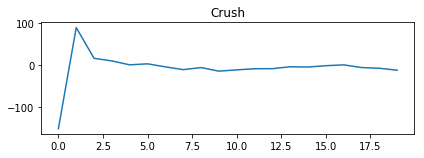

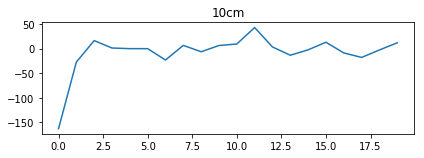

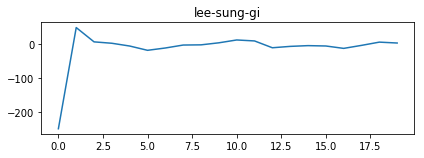

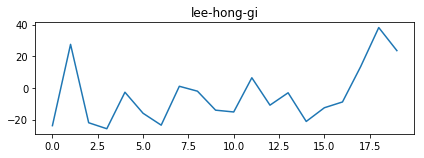

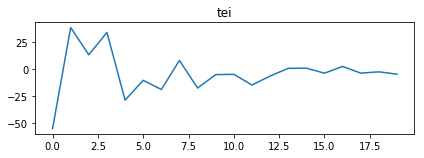

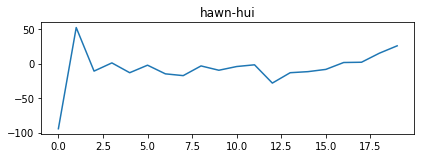

In [133]:
for i in range(6):
    song = local_path.format(vocal[i])
    x , sr_x = librosa.load(song)
    mfcc = librosa.feature.mfcc(x,sr=sr_x,n_mels=50, fmax=5000)
    mfcc_sam = mfcc.T[int(len(mfcc.T)/2)] #중간에서 추출
    plt.subplot(211)
    plt.plot(mfcc_sam)
    plt.title(vocal_eng[i])
    plt.tight_layout()
    plt.show()